In [1]:
%%capture
!pip install numpy
!pip install spacy
!pip install librosa
!pip install matplotlib
!pip install pydub
!pip install scipy
!pip install wave
!pip install soundfile
!pip install ffmpeg

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import wave
import soundfile as sf

/Users/jorgemagdaleno/PycharmProjects/pythonProject/.venv/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Duración: 10.384739229024943 segundos


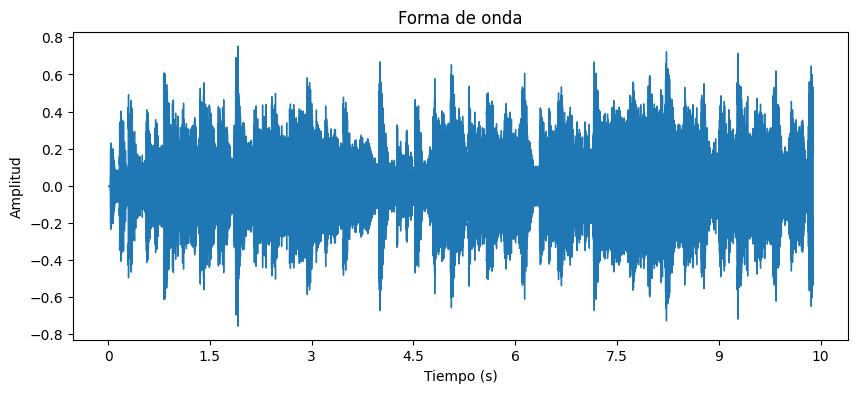

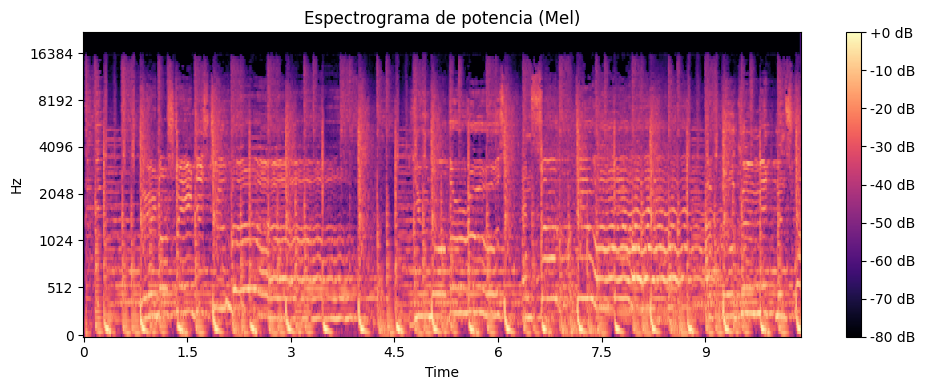

In [3]:
# 1 Cargar el audio usando librosa
y, sr = librosa.load("audio.wav", sr=None)
print(f"Duración: {librosa.get_duration(y=y, sr=sr)} segundos")

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Forma de onda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

# Calcular el espectrograma de potencia
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potencia (Mel)')
plt.tight_layout()
plt.show()



In [4]:
# 2 Aplicar efectos con PyDub
sound = AudioSegment.from_file("audio.wav")
# velocidad
sound_faster = sound.speedup(playback_speed=1.5)
# bajar volumen
sound_quieter = sound - 10  # Reducir 10 decibeles
# anadir fade
sound_fade_in = sound.fade_in(2000)  # 2 segundos de fade

sound_faster.export("audio_faster.wav", format="wav")
sound_quieter.export("audio_quieter.wav", format="wav")
sound_fade_in.export("audio_fade_in.wav", format="wav")


<_io.BufferedRandom name='audio_fade_in.wav'>

In [5]:
# 3 Leer datos de audio con wave
with wave.open("audio.wav", "rb") as wf:
    print(f"Canales: {wf.getnchannels()}, Frecuencia de muestreo: {wf.getframerate()}")
    print(f"Duración: {wf.getnframes() / wf.getframerate()} segundos")


Canales: 2, Frecuencia de muestreo: 44100
Duración: 10.384739229024943 segundos


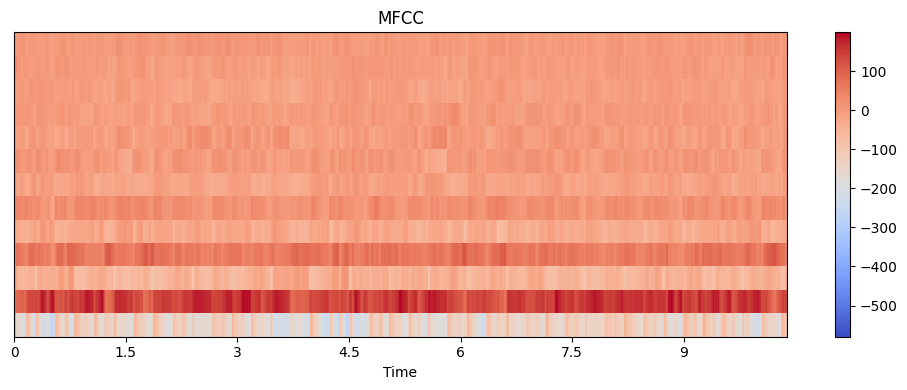

In [6]:
# 4 Extraer características con librosa
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()
plt.show()

In [7]:
# 5 modificar y aplificar con Soundfile

amplified = y * 2
    # Normalizar si es necesario para evitar saturacion
if np.max(np.abs(amplified)) > 1.0:
    amplified = amplified / np.max(np.abs(amplified))
    # Guardar el archivo modificado
sf.write("audio_amplified.wav", amplified, sr)

In [8]:
# 6 filtro pasa bajos con SciPy
# Definir el filtro pasa bajos
nyquist = 0.5 * sr
normal_cutoff = 1000 / nyquist
b, a = butter(5, normal_cutoff, btype='low', analog=False)
filtered = lfilter(b, a, y)
# Guardar el archivo filtrado
sf.write("audio_filtered.wav", filtered, sr)
